<h1 style="font-size: 40px;">MS STUDIOS MARKET LANDSCAPE ANALYSYS</h1>

![Local Image](Logo.jpg)


 <h1 style="font-size: 24px;">Overview</h1>

This project analyzes the understanding of the market landscape needed to by Microsoft to start a new movie studio, which  looks to secure a portion of the market that is already dominated by the existing movie produces and eventually become the leading studio. Exploratory analysis of the movies produced, the ratings, the genre the sales/revenue, the market capture among the existing movie producers and the average runtime of the movies being produced. The MS studios can use this analysis to undestand their immidiate market to inform decision making as they build one of the leading movie studios, MS STUDIOS.

<h1 style="font-size: 24px;">Business Problem</h1>

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

In [2]:
#loading the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<h1 style="font-size: 24px;">Loading the 1st dataset, 'bom.movie_gross.csv'</h1>


In [12]:
#loading the 1st dataset to pandas dataframe and calling the first 6 rows
df1 = pd.read_csv('Data/bom.movie_gross.csv')
df1.head(6)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010


In [13]:
#Getting the information on the 1st dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the result we have 3 data types objects, integer and floats. 
We need to change the data types for 'foreign_gross' and 'year' columns to float and datetime respectivety

In [14]:
#setting errors parameter to 'coerce' to change to NaN any value that can't change to numeric
df1['foreign_gross']= pd.to_numeric(df1['foreign_gross'], errors='coerce')
#changing the year to datetime
df1['year']=pd.to_datetime(df1['year'],format='%Y')

In [15]:
#Checking for the changes sfter changing column datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3387 non-null   object        
 1   studio          3382 non-null   object        
 2   domestic_gross  3359 non-null   float64       
 3   foreign_gross   2032 non-null   float64       
 4   year            3387 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 132.4+ KB


In [16]:
#Checking missing data for every column
df1.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

studio is missing 5 data pionts, domestic_gross is missing 28 datapoints and 
foreign_gross is missing 1350 datapoints

I will be replacing the values in studio and domestic_gross column and dropping the foreign_gross column because the amount of data missing is significant to the analysis

<h1 style="font-size: 24px;">Data cleaning, 1st dataset</h1>

In [17]:
# Replacing the missing values under the studio column with "NA"
df1['studio'] = df1['studio'].fillna('NA')
# Replacing the domestiv_gross with the median
df1['domestic_gross'].fillna(df1['domestic_gross'].median(), inplace=True)
#dropping the foreign_gross column
df1.drop(columns=['foreign_gross'], inplace=True)

In [18]:
#cheking the changes on the columns based on the missing data
df1.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [19]:
df1

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010-01-01
1,Alice in Wonderland (2010),BV,334200000.0,2010-01-01
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010-01-01
3,Inception,WB,292600000.0,2010-01-01
4,Shrek Forever After,P/DW,238700000.0,2010-01-01
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018-01-01
3383,Edward II (2018 re-release),FM,4800.0,2018-01-01
3384,El Pacto,Sony,2500.0,2018-01-01
3385,The Swan,Synergetic,2400.0,2018-01-01


<h1 style="font-size: 24px;">Loading the 2nd dataset 'title.basics.csv'</h1>

In [21]:
#loading the second data into the pandas dataframe
df2= pd.read_csv('Data/title.basics.csv')
df2.head(6)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy


In [22]:
##Getting the information on the 2nd dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The column Data types for the 2nd dataset are object,integer and float
We have 146144 row and 6 colums

<h1 style="font-size: 24px;">Data cleaning, the 2nd Dataset</h1>

In [23]:
#changing the year to datetime
df2['start_year']=pd.to_datetime(df2['start_year'],format='%Y')

In [24]:
#checking the missing data in all the colums
df2.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [25]:
#checking the statistical information of the column(s) with datatype integer
df2.describe()

,runtime_minutes
count,114405.000000
mean,86.187247
std,166.360590
min,1.000000
25%,70.000000
50%,87.000000
75%,99.000000
max,51420.000000


In [26]:
# using median to replace the missing values
df2['runtime_minutes'].fillna(df2['runtime_minutes'].median(), inplace=True)
#replacing the missing values under original_title with NA
df2['original_title'] = df2['original_title'].fillna('NA')
#replacing the missing values in genre with NA
df2['genres'] = df2['genres'].fillna('NA')

I used median to replace the missing values in the column runtime_minutes because the median is has less effect on the variance of the dataset compared to the means

In [27]:
#checking the chenges after replacing
df2.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [28]:
df2.head(6)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013-01-01,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019-01-01,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018-01-01,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018-01-01,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017-01-01,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018-01-01,75.0,Comedy


 <h1 style="font-size: 24px;">Loading the third dataset, 'title.ratings.csv'</h1>

In [31]:
# loading the data into pandas 
df3= pd.read_csv('Data/title.ratings.csv')
df3.head(6)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326


In [32]:
#getting the information of the dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [33]:
#checking the missing values 
df3.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

 <h1 style="font-size: 24px;">The data df3 has no missing values</h1>
 
 
 
 

<h1 style="font-size: 36px;">Merging the 3 datasets (df1,df2 and df3)</h1>

In [34]:
# merging Df2 and df3 with the key being tconst column
df2_df3 = pd.merge(df2, df3, on='tconst', how='inner')
df2_df3

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013-01-01,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019-01-01,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018-01-01,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018-01-01,87.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017-01-01,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019-01-01,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019-01-01,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017-01-01,87.0,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019-01-01,87.0,NA,6.6,5


In [35]:
df2_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tconst           73856 non-null  object        
 1   primary_title    73856 non-null  object        
 2   original_title   73856 non-null  object        
 3   start_year       73856 non-null  datetime64[ns]
 4   runtime_minutes  73856 non-null  float64       
 5   genres           73856 non-null  object        
 6   averagerating    73856 non-null  float64       
 7   numvotes         73856 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 5.1+ MB


In [36]:
#changing the column name from primary_title to title to enable inner merging of df2_df3 and df1  
df2_df3= df2_df3.rename(columns={'primary_title': 'title'})
df2_df3

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013-01-01,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019-01-01,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018-01-01,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018-01-01,87.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017-01-01,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019-01-01,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019-01-01,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017-01-01,87.0,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019-01-01,87.0,NA,6.6,5


In [37]:
#Checking the infomation of the new data df2_df3
df2_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tconst           73856 non-null  object        
 1   title            73856 non-null  object        
 2   original_title   73856 non-null  object        
 3   start_year       73856 non-null  datetime64[ns]
 4   runtime_minutes  73856 non-null  float64       
 5   genres           73856 non-null  object        
 6   averagerating    73856 non-null  float64       
 7   numvotes         73856 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 5.1+ MB


In [38]:
#merging our new data df2_df3 with the first data(df1)
df1_df2_df3 = df2_df3.merge(df1, on='title', how='inner')
df1_df2_df3

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,year
0,tt0315642,Wazir,Wazir,2016-01-01,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,2016-01-01
1,tt0337692,On the Road,On the Road,2012-01-01,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,2012-01-01
2,tt4339118,On the Road,On the Road,2014-01-01,89.0,Drama,6.0,6,IFC,744000.0,2012-01-01
3,tt5647250,On the Road,On the Road,2016-01-01,121.0,Drama,5.7,127,IFC,744000.0,2012-01-01
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013-01-01,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018-01-01,102.0,Drama,7.1,147,FM,300.0,2015-01-01
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018-01-01,101.0,Romance,6.5,607,WGUSA,747000.0,2018-01-01
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018-01-01,135.0,Drama,5.4,673,Eros,72000.0,2018-01-01
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018-01-01,114.0,"Drama,Romance",6.4,322,CL,181000.0,2018-01-01


In [39]:
# checking the information of our new dataset
df1_df2_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tconst           3027 non-null   object        
 1   title            3027 non-null   object        
 2   original_title   3027 non-null   object        
 3   start_year       3027 non-null   datetime64[ns]
 4   runtime_minutes  3027 non-null   float64       
 5   genres           3027 non-null   object        
 6   averagerating    3027 non-null   float64       
 7   numvotes         3027 non-null   int64         
 8   studio           3027 non-null   object        
 9   domestic_gross   3027 non-null   float64       
 10  year             3027 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 283.8+ KB


In [40]:
df1_df2_df3['runtime_minutes']= pd.to_numeric(df1_df2_df3['runtime_minutes'], errors='coerce')

In [41]:
#Checking for missing values in our new dataset
df1_df2_df3.isna().sum()

tconst             0
title              0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
studio             0
domestic_gross     0
year               0
dtype: int64

In [42]:
#droping less useful columns
df1_df2_df3 =df1_df2_df3.drop(['tconst','original_title','start_year'], axis=1)
df1_df2_df3

,title,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,year
0,Wazir,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,2016-01-01
1,On the Road,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,2012-01-01
2,On the Road,89.0,Drama,6.0,6,IFC,744000.0,2012-01-01
3,On the Road,121.0,Drama,5.7,127,IFC,744000.0,2012-01-01
4,The Secret Life of Walter Mitty,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,2013-01-01
...,...,...,...,...,...,...,...,...
3022,The Chambermaid,102.0,Drama,7.1,147,FM,300.0,2015-01-01
3023,How Long Will I Love U,101.0,Romance,6.5,607,WGUSA,747000.0,2018-01-01
3024,Helicopter Eela,135.0,Drama,5.4,673,Eros,72000.0,2018-01-01
3025,Last Letter,114.0,"Drama,Romance",6.4,322,CL,181000.0,2018-01-01


In [43]:
#discriptive stats for columns with floats and integer datatypes
df1_df2_df3.describe()

,runtime_minutes,averagerating,numvotes,domestic_gross
count,3027.000000,3027.000000,3.027000e+03,3.027000e+03
mean,106.903204,6.457582,6.170030e+04,3.042782e+07
std,20.073663,1.012277,1.255132e+05,6.651972e+07
min,3.000000,1.600000,5.000000e+00,1.000000e+02
25%,93.000000,5.900000,2.117000e+03,1.445000e+05
50%,104.000000,6.600000,1.310900e+04,1.900000e+06
75%,118.000000,7.100000,6.276550e+04,3.210000e+07
max,272.000000,9.200000,1.841066e+06,7.001000e+08


<h1 style="font-size: 36px;">Analysis</h1>

<h1 style="font-size: 12px;">Qn. Based on genre, What type of movies generate the most revenues and whats the relationship of the movie rating to sales?</h1>

In [44]:
#grouping data by genre for plotting
grouped_genres = df1_df2_df3.groupby('genres')[['averagerating', 'domestic_gross']].sum()
#arranging the grouped averagerating data in decending order and viewing the 1st 10 rows
grouped_genres_AVR = grouped_genres.sort_values(by=['averagerating'], ascending=False)
#greating a viariable to hold the 1st 10
grouped_averagerating= grouped_genres_AVR.head(50)
grouped_averagerating

,averagerating,domestic_gross
genres,,
Drama,2115.3,3.049094e+09
"Comedy,Drama",876.3,1.731282e+09
"Comedy,Drama,Romance",838.2,1.673457e+09
Documentary,793.6,1.698565e+09
"Drama,Romance",743.8,1.048307e+09
Comedy,550.4,2.359043e+09
"Adventure,Animation,Comedy",482.9,9.645133e+09
"Comedy,Romance",437.8,1.848823e+09
"Drama,Thriller",348.0,8.291860e+08


In [45]:
#arranging the domestic_gross data in decending order and viewing the 1st 10 rows
grouped_genres_DG = grouped_genres.sort_values(by=['domestic_gross'], ascending=False)
#greating a viariable to hold the 1st 10
grouped_domestic_gross=grouped_genres_DG.head(50)
grouped_domestic_gross

,averagerating,domestic_gross
genres,,
"Action,Adventure,Sci-Fi",318.5,1.102470e+10
"Adventure,Animation,Comedy",482.9,9.645133e+09
"Action,Adventure,Fantasy",194.9,4.378787e+09
"Action,Adventure,Comedy",200.7,3.172472e+09
Drama,2115.3,3.049094e+09
Comedy,550.4,2.359043e+09
"Action,Adventure,Animation",161.8,2.184660e+09
"Action,Adventure,Thriller",110.1,1.851798e+09
"Comedy,Romance",437.8,1.848823e+09


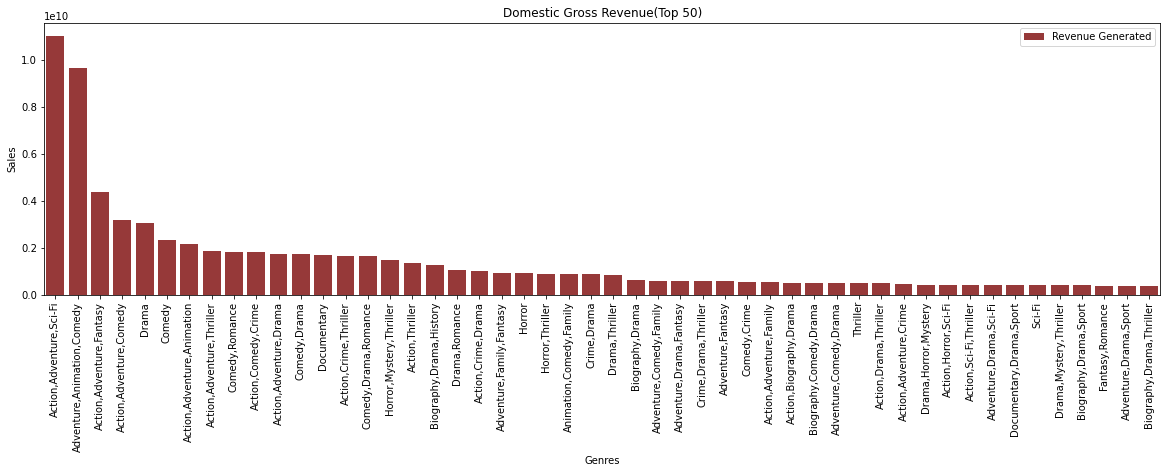

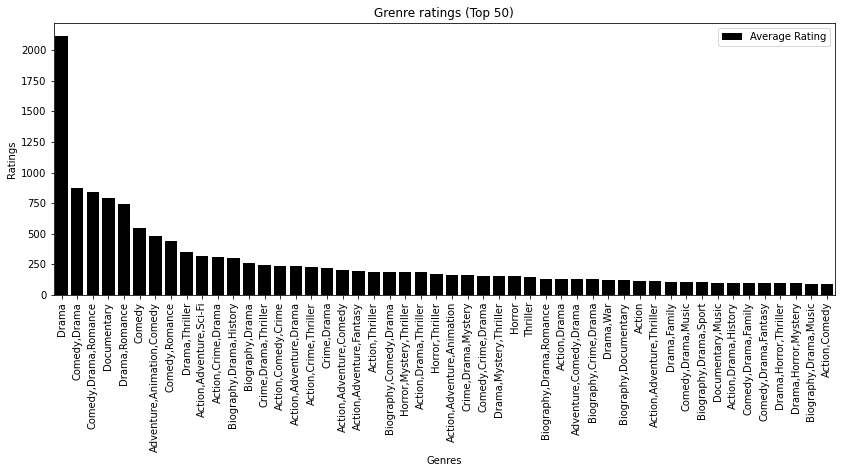

In [46]:
#Ploting the most profitable, the most popular and the most produced genre 
plt.figure(figsize=(20, 5))  # Set the figure size (optional)

# Plot the grouped data
sns.barplot(x=grouped_domestic_gross.index, y='domestic_gross', data=grouped_domestic_gross, label='Revenue Generated',color='brown')

# Customize the plot
plt.xlabel('Genres')
plt.ylabel('Sales')
plt.title('Domestic Gross Revenue(Top 50)')
# Rotate x-axis labels for better readability
plt.xticks(rotation= 90) 
plt.legend()

# Show the plot
plt.show()

#Ploting the most profitable, the most popular and the most produced genre 
plt.figure(figsize=(14, 5))  # Set the figure size (optional)

# Plot the grouped data
sns.barplot(x=grouped_averagerating.index, y='averagerating', data=grouped_averagerating, label='Average Rating',color='Black')

# Customize the plot
plt.xlabel('Genres')
plt.ylabel('Ratings')
plt.title('Grenre ratings (Top 50)')
# Rotate x-axis labels for better readability
plt.xticks(rotation= 90) 
plt.legend()

# Show the plot
plt.show()

Films combining action,adventure and Sci-Fi perform better in revenue generation as compared to the other sets of diversification of filims. This is closely followed by a combination of action,adventure & comedy and at third place action,adventure & fantacy. With this trend it is ok to conclude that films with bothaction and adventure in them performs better in revenues/sales when combined with other genres of films in a single movie

When it comes to the production of the filims, pure drama as a genre is the most produced amongest all genres followed by a combination of comedy & drama. At this point its easy to conclude that production has no impact on sales as many people buy a combination of action,adventure and Sci-Fi



<h1 style="font-size: 12px;">Qn. Which competitor has the highest production rate and higest movie ratings in the market?</h1>

In [47]:
df1_df2_df3['studio'].value_counts()

Uni.         156
IFC          145
Fox          138
WB           119
Magn.        117
            ... 
Zee            1
PI             1
Triu           1
Dreamwest      1
Rog.           1
Name: studio, Length: 217, dtype: int64

In [48]:
#getting the count of the studios
Studio_count = df1_df2_df3['studio'].value_counts()
#grouping by studio 
studios_AVR = df1_df2_df3.groupby('studio')[['averagerating']].sum()
studios_AV_count = pd.merge(studios_AVR, Studio_count, left_index=True, right_index=True)
studios_AV_count = studios_AV_count.rename(columns={'studio': 'count'})
#sorting in descending by studio
studios_AV_count= studios_AV_count.sort_values(by='count', ascending=False)
Grouped_data=studios_AV_count.head(50)
Grouped_data

,averagerating,count
Uni.,970.5,156
IFC,951.6,145
Fox,868.5,138
WB,778.1,119
Magn.,753.2,117
SPC,767.4,110
BV,671.2,97
LGF,567.4,91
Par.,577.4,90
Sony,551.9,89


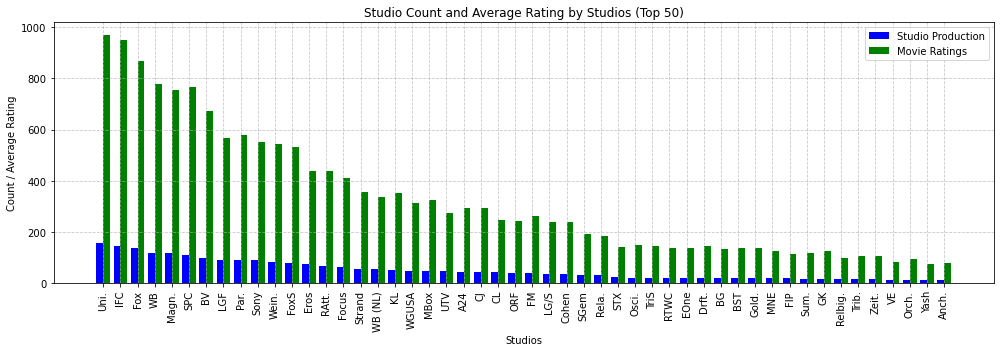

In [49]:
# Set the figure size
plt.figure(figsize=(14,5))

# Define the width of the bars
bar_width =0.4

# Define the positions of the bars
x = range(len(Grouped_data))

# Create a bar for studio count
plt.bar(x, Grouped_data['count'], width=bar_width, label='Studio Production', color='blue')

# Create a bar for studio rating
plt.bar([i + bar_width for i in x], Grouped_data['averagerating'], width=bar_width, label='Movie Ratings', color='green')

# Set the x-axis labels as studio names
plt.xticks([i + bar_width/2 for i in x], Grouped_data.index, rotation=90)

# Add labels and title
plt.xlabel('Studios')
plt.ylabel('Count / Average Rating')
plt.title('Studio Count and Average Rating by Studios (Top 50)')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The graph indicates direct proportionality of production and movie rating. In this market, the company producing the most movies also recieves the most movie rating hence the popularity. This graph is clear on market occupation based on production capacity. the production rate is at below 200 movies per company within the past few years. The production capacity is a key thing to focus on while creating movies

<h1 style="font-size: 12px;">Qn. What is the average movie runtime per company?</h1>

In [50]:
#grouping runtime_minutes by studio
studios_runtime = df1_df2_df3.groupby('studio')['runtime_minutes'].sum()
studios_runtime_count = pd.merge(studios_runtime, Studio_count, left_index=True, right_index=True)
studios_runtime_DSC = studios_runtime_count.sort_values(by='runtime_minutes', ascending=False)
#getting the mean runtime per studio and sorting by studio
studios_runtime_DSC['average_runtime'] = studios_runtime_DSC['runtime_minutes'] / studios_runtime_DSC['studio']
studios_runtime_DSC.head(20)
Top_studios_runtime_DSC

NameError: name 'Top_studios_runtime_DSC' is not defined

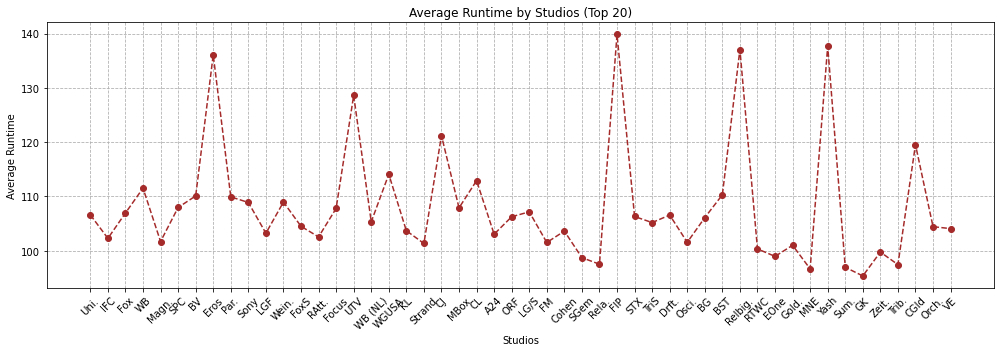

In [51]:
studios = studios_runtime_DSC.index[:50]  # Get the studio names for the top 20
average_runtimes = studios_runtime_DSC['average_runtime'][:50]  # Get the corresponding average runtimes

# Create a line graph
plt.figure(figsize=(14, 5))
plt.plot(studios, average_runtimes, marker='o', linestyle='--', color='brown')

# Set the x-axis labels as studio names
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Studios')
plt.ylabel('Average Runtime')
plt.title('Average Runtime by Studios (Top 20)')

# Show the plot
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

The average runtime of each movie differ per company with the most producing movies having an average runtime of less than 110 minutes. Generaly most competitors have their averager runtime per filim below the mentioned mark. This can change based on the demands in the market and/or based on the subsequent ratings and feedback

<h1 style="font-size: 12px;">Qn. What is the sales per studio in the past 5 yeas?</h1>

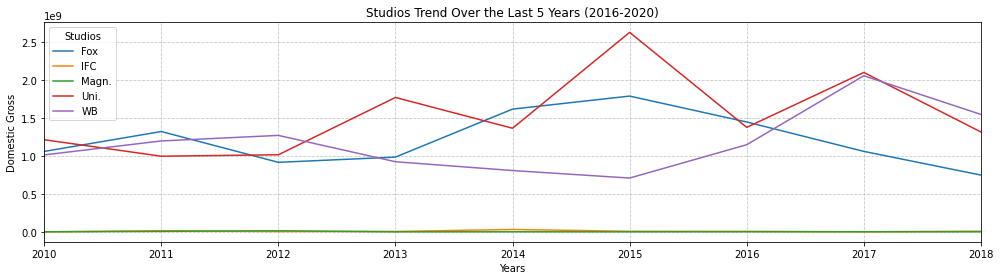

In [52]:
# Convert the end_year to a datetime object
end_year = pd.to_datetime('2020-01-01')

# Filter data for the last 5 years (up to 2020)
filtered_data = df1_df2_df3[df1_df2_df3['year'] <= end_year]

# Calculate the top 20 studios based on their count in the 'studio' column
top_studios = filtered_data['studio'].value_counts().nlargest(5).index

# Filter data to include only the top 20 studios
filtered_data = filtered_data[filtered_data['studio'].isin(top_studios)]

# Group data by 'year' and 'studio' and sum 'domestic_gross'
grouped_data = filtered_data.groupby(['year', 'studio'])['domestic_gross'].sum().unstack()

# Plot the data
plt.figure(figsize=(14, 4))
grouped_data.plot(kind='line', ax=plt.gca())

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Domestic Gross')
plt.title('Studios Trend Over the Last 5 Years (2016-2020)')

# Show the plot
plt.legend(title='Studios')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The graph above analyses the market trends of 10 companies in the last 9 years. It shows the companies with the top sales within those and also indicates the possible competition in the market. most of the graphs have an irregular trend, an indication that the movie market is not stable and flactuations are anticipeted

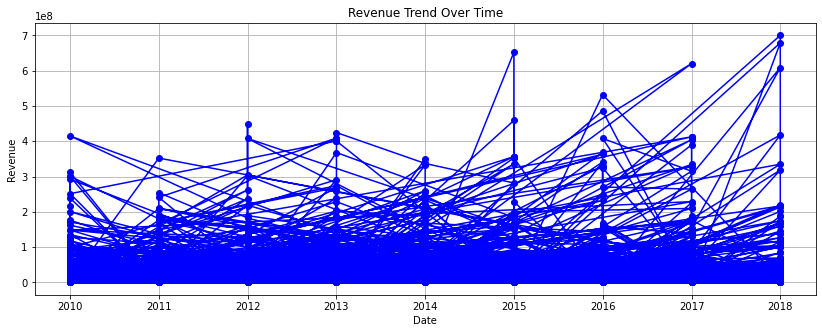

In [57]:
# Create the line plot toshow revenue trends
plt.figure(figsize=(14, 5))
plt.plot(df1_df2_df3['year'], df1_df2_df3['domestic_gross'], marker='o', linestyle='-', color='b')
plt.title('Revenue Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()